# Redução de cores de Pixel Arts

Este notebook mostra como utilizar um Self Organizing Map para reduzir o número de cores em uma imagem. Aqui utilizaremos como exemplo uma imagem em Pixel Art, por conhecidamente trabalharem com paletas de cores limitadas.

Utilizaremos a biblioteca MiniSom para criar o SOM, numpy para representar os dados da imagem escolhida e o MatPlotLib para visualizar a imagem antiga e a gerada.

In [137]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(229, 305, 3)

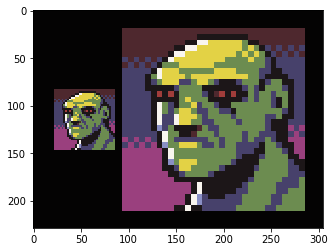

In [138]:
# Ler a imagem
img = plt.imread('pixelart.png')
plt.imshow(img)

# Dimensões da imagem (altura, largura, RGB)
img.shape

Como pode-se observar, a imagem está representada com 3 dimensões. Dentro do primeiro vetor, o da altura, há um vetor para cada linha da imagem, e em cada posição deste, há um vetor com as informações RGB do pixel.

Vamos utilizar a função reshape do numpy para colocar todos os pixels dentro de um único vetor, ao invés de uma tabela.

In [139]:
# Alterar a representação da imagem para 2D, ao invés de 3D
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))

pixels

array([[0.01568628, 0.01176471, 0.01176471],
       [0.01568628, 0.01176471, 0.01176471],
       [0.01568628, 0.01176471, 0.01176471],
       ...,
       [0.01568628, 0.01176471, 0.01176471],
       [0.01568628, 0.01176471, 0.01176471],
       [0.01568628, 0.01176471, 0.01176471]], dtype=float32)

A seguir, criamos um SOM de tamanho 3x3, limitando a paleta final a 9 cores.
Inicializamos o mapa com pesos aleatórios, provindos das cores da imagem. Após isso, treinamos o mapa por 1000 épocas, utilizando pixels aleatórios da imagem.

Para reduzir a quantidade de cores, utilizamos o método quantization, que faz uma quantização dos vetores das cores dos pixels. Para entender mais sobre quantização de vetores, [clique aqui](https://en.wikipedia.org/wiki/Vector_quantization).

In [140]:
som = MiniSom(x= 3, y = 3, input_len = 3, sigma=1., learning_rate=.2, neighborhood_function='bubble')

som.random_weights_init(pixels)

som.train_random(pixels, 1000, verbose=True)
qnt = som.quantization(pixels)
clustered = np.zeros(img.shape)

for i, q in enumerate(qnt):
  clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

 [  896 / 1000 ]  90% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.07863822799222442
 topographic error: 0.06070584866490085


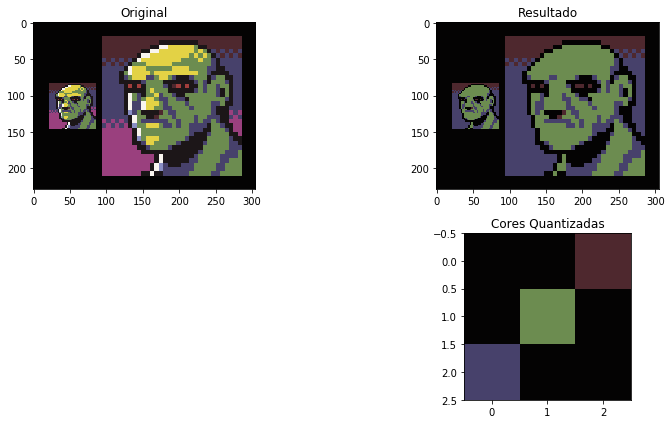

In [141]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.title('Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Resultado')
plt.imshow(clustered)

plt.subplot(224)
plt.title('Cores Quantizadas')
plt.imshow(som.get_weights())

plt.tight_layout()
plt.show()